# Apply association rule to find rules with the current dataset? For example, a customer who purchased peanut butter and jelly together has also purchased bread

In [1]:
# import required lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

import warnings
warnings.filterwarnings("ignore")

# Load data from all the sources

In [2]:
#Read the data
orders_all = pd.read_csv("perf_test_orderdata/orders_all.csv")
orders_times = pd.read_csv("perf_test_orderdata/orders_times.csv")

In [3]:
#join the column to connect the two csv data
merge = pd.merge(orders_all,orders_times,how='left',on='admin_reference')

In [4]:
#load product data collected from API
# products = pd.read_csv("products.csv")

# Prepare Data

In [5]:
#drop the features which has most null values
orders = merge.drop(['completed_at_x','customer_company','bill_state_name','ship_state_name','ship_company','subsite_store','campaign_code','bill_company'],axis=1)

In [6]:
#for campaign 
campaign_code = merge.drop(['completed_at_x','customer_company','bill_state_name','ship_state_name','ship_company','subsite_store','bill_company'],axis=1)

In [7]:
#prepasre the dat 
def prep_data(data):
    #Date and time is splitted
    new = data["completed_at_y"].str.split(" ", n = 1, expand = True) 
    data['Date'] = new[0]
    data['Time'] = new[1]
    #Day, month and year is splitted
    new = data["Date"].str.split("-", n = 2, expand = True) 
    data['Year'] = new[0]
    data['Month'] = new[1]
    data['Day'] = new[2]
    #drop null values
    data = data.dropna()
    #convert month number to month name
    data['Month'] = data['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])
    #Date and time is splitted
    new = data["Time"].str.split(":", n = 1, expand = True) 
    data['Hour'] = new[0]
    data['Minute'] = new[1]

    data['Date'] = pd.to_datetime(data['Date'])  # Step 1
    data['DayofWeek'] =data['Date'].dt.day_name()  # Step 2
    return data

In [8]:
orders = prep_data(orders)
campaign_code = prep_data(campaign_code)

In [9]:
#update values in orders table
# orders['group_name'] = None
# orders.update(products)

In [10]:
orders = orders.drop([ 'state', 'shipment_state',
       'currency', 'bill_zipcode',
       'ship_city', 'ship_zipcode', 'ship_country_iso_name'],axis=1)

In [11]:
orders.head(2)

,admin_reference,payment_state,total,bill_city,bill_country_iso_name,product_name,quantity,sku,completed_at_y,Date,Time,Year,Month,Day,Hour,Minute,DayofWeek
1,O160651894,paid,97.21,Hafrsfjord,NO,AROMA Svartvinbärstoppar 900g,1,WEB7098,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday
2,O160651894,paid,97.21,Hafrsfjord,NO,AROMA HALLON & LAKRITSBÅTAR 900G 2:a sor,1,WEB7080,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday


In [12]:
# products = products.drop(['ID', 'product_id', 'ean', 'is_master', 'weight',
#        'reference', 'source_owner', 'source_id', 'best_price', 'stock_available_qty', 'sku_api',
#        'group_description', 'group_properties','current_price'],axis=1)

In [13]:
orders.groupby(by = ['admin_reference','product_name']).sum().drop(['total','quantity'],axis=1)

Empty DataFrame
Columns: []
Index: [(O000000802, 3 brett Fanta Lemon 33 cl), (O000001094, Choco/krokant - 1 kg), (O000001094, Chocolate Liqueurs 250g), (O000001094, LAKRITSI LEMON - Hel låda - 30 st), (O000001094, Lutti Krokodiler 1 kg), (O000001094, Snöre äpple 1kg), (O000003524, Djungelvrål - 2 kg MAX 1), (O000010704, Gott & Blandat Giants - 1,8 kg), (O000010704, Gott o Blandat Supersur.mindre socker 90), (O000010704, Haribo Chamallows Mix - 175g), (O000010704, Hemliga Ät snart-lådan), (O000014086, Sommarboxen - 3 brett + Pingvinstänger), (O000016661, Coca-Cola 24 st - Max 1 per order), (O000016661, Estrella Cheddar & Sourcream Chips 175g), (O000016661, Norsk Pant 2-kr 24st), (O000017893, Skånes Dunderpulver Extra starkt 24 st), (O000023023, Extra Eucalyptus 30-pack - MAX 1), (O000023023, Halloween - Dracula & Spöken 125g), (O000023023, Halloween - Runda chokladfigurer 125g), (O000023023, MALLORCA MIX - 2,28 kg), (O000023023, Marabou Mjölkchoklad 100g x 5 st), (O000025529, Jellymix - 2 kg), (O000025529, OLW Cheez Snow Ballz - 160 g), (O000028158, PEPSI ORIGINAL - 3 BRETT - 384KR INK. FRAKT), (O000029766, Banan/toffekola 1,3 kg), (O000029766, Crispy Flaeskesver Jalapeno Chili - 70g), (O000029766, Crispy Flaeskesver Salt - 75g), (O000029766, Zoom Strawberry 60g x 14 st), (O000034632, Aroma Gelehallon - 900g  2:a sort), (O000034632, Aroma Godismix - Andrasortering 900g), (O000034806, Chokladpraline 400 g Maître Truffout), (O000034806, Christmas Trees 3 kg), (O000034806, JULESKUM ORIGINAL PÅSE 100G), (O000034806, Julgran 90cm 80 grenar), (O000034806, Marsipanbröd - 10-pack), (O000034806, Mozartkulor presentask 300 g Maître Truf), (O000034806, Tomteryggsäck med godis 162 g), (O000035200, 2 brett Coca-Cola + 3 kilo Busiga Bävrar), (O000036063, Jellymix - 2 kg), (O000036063, Pringles BBQ Teriyaki 180g), (O000036063, Pringles Streetfood Thai green Curry 190), (O000036063, TUC Original - 5 st), (O000037699, Christmas Trees 3 kg), (O000037699, Lutti Krokodiler 1 kg), (O000037699, Vidal Sour Orange Fingers - 2kg), (O000037699, WEB-GODISBLANDNING 500G PÅSE), (O000042445, MAXIBAG - Dill & Gräslök 450g), (O000042445, MAXIBAG - Lättsaltade 450g), (O000042445, PEPSI 33CL), (O000042445, Svensk Pant 1 kr 24), (O000042630, Nordic Energy High Caffeine 3 brett), (O000045428, Norgeboxen - Läsk, Capri-Sun och Choklad), (O000053398, Bloody Eyes Jelly - 2 kg), (O000053398, Chokly Tryffel/Mandel - 2,2 kg), (O000053398, DVD fodral), (O000053398, Dumle Sunny Orange 220 g), (O000053398, HALLS Spearmint Sockerfri 4-pack), (O000053398, Halls Watermelon Sockerfri 4-pack), (O000053398, Jellymix - 2 kg), (O000056997, Center - 2,2 kg MAX 1), (O000056997, GEISHA - 3 kg), (O000056997, MONSTER ULTRA (VIT) 50 CL - 24 st), (O000056997, Svensk Pant 1 kr 24), (O000056997, Twix 50g x 32 st), (O000057282, 3 BRETT PEPSI MAX), (O000057694, Pepsi Max 3 brett - 384kr ink. frakt), (O000062941, Aroma Sura Fiskar 2:A 900 gram), (O000062941, Fruktklubbor Mix - 1kg), (O000062941, Hemliga Ät snart-lådan), (O000065920, Big Dipper 47g x 12 st - MAX 10 per ord.), (O000065920, Chili Extreme - Polkaprinsen - 50 g), (O000065920, Click-Mix - 2,4 kg), (O000065920, FLAMIN HOT 225 g), (O000065920, Kettle Cooked Paprika 150g), (O000065920, Kettle Cooked Seasalt 150g), (O000065920, Kettle Cooked Sweet BBQ 150g), (O000065920, MAXIBAG - Cheez Balls 420g), (O000065920, PRINGLES ORIGINAL 200 G), (O000065920, Sex kilo godis), (O000069223, Filidutter Päron - 65g), (O000069223, KLOAKSLAM PÅSE 125G), (O000069223, MÅSSKITAR - PÅSE 125G), (O000069223, RUTTNA FISKAR PÅSE 125G), (O000069223, SOPTIPP/LOSSEPLADS - PÅSE 125G - 1 st), (O000070559, BISKVI 6-PACK), (O000070559, Delicato Kondisbit Nöt-creme - 6-pack), (O000071760, Blaze Giant Eggs 12 st - Värmeskadade), (O000071760, Dubble Bubble Tetra Refill), (O000071760, Halloweenpåse Scary Party 200g), (O000071760, Mini Burger 540 g), (O000071760, Mini Pizzas - 3-slices - 48 st  x 15g), (O000071760, Paw Patrol Tooth Lollipop - 30 st), (O000071760, Twisty

## Association rule.
Generate strong/weak rule sets from the data. (Rule based system)

1. Terms: 
    1. Support: Support is an indication of how frequently the itemset appears in the dataset.
    2. Confidence: Confidence is an indication of how often the rule has been found to be true.
    3. Lift: The ratio of the confidence of the rule and the expected confidence of the rule
    4. Conviction: Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y.

2. Apriori: (https://www.youtube.com/watch?v=h_l3b2CIQ_o)
    1. Steps
         1. Determine the support of itemsets in the transactional database, and select the minimum support and confidence.
         2. Take all supports in the transaction with higher support value than the minimum or selected support value.
         3. Find all the rules of these subsets that have higher confidence value than the threshold or minimum confidence.
         4. Sort the rules as the decreasing order of lift.
    2. Pros:
        1. This is easy to understand algorithm 
        2. The join and prune steps of the algorithm can be easily implemented on large datasets.
    3. Cons: 
        1. The apriori algorithm works slow compared to other algorithms. 
        2. The overall performance can be reduced as it scans the database for multiple times. 
        3. The time complexity and space complexity of the apriori algorithm is O(2D), which is very high. Here D represents the horizontal width present in the database.

3. FP-Growth (https://www.youtube.com/watch?v=ToswH_dA7KU)
    1. Steps:
        1. Scan DB once, find frequent 1-itemset (single item pattern)
        2. Sort frequent items in frequency descending order, f-list
        3. Scan DB again, construct FP-tree
        4. Construct the conditional FP tree in the sequence of reverse order of F - List - generate frequent item set
    2. Pros
         1. This algorithm needs to scan the database only twice when compared to Apriori which scans the transactions for each iteration.
        2. The pairing of items is not done in this algorithm and this makes it faster.
        3. The database is stored in a compact version in memory. 
        4. It is efficient and scalable for mining both long and short frequent patterns.
    3. Cons
        1. FP Tree is more cumbersome and difficult to build than Apriori.
        2. When the database is large, the algorithm may not fit in the shared memory.
        3. Expensive.
#### Not Implemented
4. ECLAT (Equivalence class transformation) https://www.youtube.com/watch?v=oBiq8cMkTCU
    Eclat algorithm uses a Depth first search for discovering frequent item sets, whereas Apriori algorithm uses breadth first search. It represents the data in vertical manner unlike Apriori algorithm which represents data in horizontal pattern. This vertical pattern of Eclat algorithm making it into faster algorithm compared to Apriori algorithm. Hence, Eclat algorithm is more efficient and scalable version of the Association Rule Learning.
    
    1. Pros:
        1. Since the Eclat algorithm uses a Depth-First Search approach, it consumes less memory than the Apriori algorithm.
        2. The Eclat algorithm is naturally faster compared to the Apriori algorithm.
        3. The Eclat algorithm does not involve in the repeated scanning of the data in order to calculate the individual support values.
        4. This algorithm is better suited for small and medium datasets where as Apriori algorithm is used for large datasets.
        5. Eclat algorithm scans the currently generated dataset unlike Apriori which scans the original dataset.
    2. Cons:
        1. More memory space and processing time are required for intersecting long TID sets
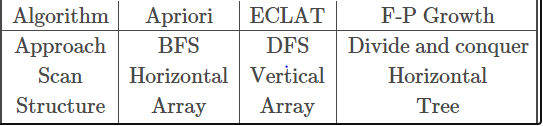

### Apriori

In [14]:
#Remove space in the product name
orders['product_name'] = orders['product_name'].str.strip()

In [15]:
#drop empty admin_reference
orders.dropna(axis=0, subset=['admin_reference'], inplace=True)

In [16]:
#Data clean
orders = orders[~orders['admin_reference'].str.contains('C')]
orders

,admin_reference,payment_state,total,bill_city,bill_country_iso_name,product_name,quantity,sku,completed_at_y,Date,Time,Year,Month,Day,Hour,Minute,DayofWeek
1,O160651894,paid,97.21,Hafrsfjord,NO,AROMA Svartvinbärstoppar 900g,1,WEB7098,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday
2,O160651894,paid,97.21,Hafrsfjord,NO,AROMA HALLON & LAKRITSBÅTAR 900G 2:a sor,1,WEB7080,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday
3,O082676927,paid,435.00,Vrigstad,SE,FREIA 43G MANDELSTANG x 30 st,1,KLIPP66654,2018-06-12 11:44,2018-06-12,11:44,2018,Jun,12,11,44,Tuesday
4,O082676927,paid,435.00,Vrigstad,SE,"DEVILS JORDGUBB/LAKRITS - 1,5 kg",1,GRA669,2018-06-12 11:44,2018-06-12,11:44,2018,Jun,12,11,44,Tuesday
5,O082676927,paid,435.00,Vrigstad,SE,Jordgubbsmattor Sockrade - 1 kg,1,KLIPP41192,2018-06-12 11:44,2018-06-12,11:44,2018,Jun,12,11,44,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886928,O944466975,paid,2666.97,Støren,NO,Kinder Maxi 36 st,1,FER505,2020-09-28 15:45,2020-09-28,15:45,2020,Sep,28,15,45,Monday
886929,O944466975,paid,2666.97,Støren,NO,M&M Peanut 1 kg,1,WEB275810,2020-09-28 15:45,2020-09-28,15:45,2020,Sep,28,15,45,Monday
886930,O944466975,paid,2666.97,Støren,NO,Snickers 50g x 32 st,1,MAS280972,2020-09-28 15:45,2020-09-28,15:45,2020,Sep,28,15,45,Monday
886931,O944466975,paid,2666.97,Støren,NO,WEB-AFTER EIGHT 400G,1,WEB35256,2020-09-28 15:45,2020-09-28,15:45,2020,Sep,28,15,45,Monday


In [17]:
#prepare a basket
basket = orders.groupby(['admin_reference', 'product_name'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('admin_reference')

In [18]:
basket

product_name,"""3DTavla """"Home""""""","""Chupa Chups """"Want U"""" magnet""",1 Flak FantaMezzo & 1 Flak CocaCola 33cl,1 brett Coca-Cola Zero,1 brett Coca-Cola och 1 Brett 7-UP,1 brett Dr Pepper + 1 brett Pepsi Max,1 brett Fanta Exotic + 2 brett Fanta org,1 brett Pepsi Max + 1 After Eight 400g,1 brett Sprite + 2 brett Coca-Cola,1 brett Sprite Zero - PANTFRITT,...,ÄT - Twist 145 g 1 aug,ÄT- Dipmix Vitl &Gurka 24g - 16st,ÄT- Rocher 4-pack - 16st 15 juni,ÄT- Rocher 4-pack - 16st 29juni,Ägglåda för 6st ägg,Äggskallar skum - 1 kg,"Äggskallar skum - 2,8 kg",Äppel Salmiak Öra 1 kg påse,Äppel ananas Öra 1 kg påse,"Äpple/kanelkola 1,3 kg"
admin_reference,,,,,,,,,,,,,,,,,,,,,
O000000802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O000001094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O000003524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O000010704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O000014086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O999988295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O999988411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O999990596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 
#and anything less the 0 is set to 0. This step will complete the one hot encoding of the data 
#and remove the postage column (since that charge is not one we wish to explore):
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [20]:
basket_sets

product_name,"""3DTavla """"Home""""""","""Chupa Chups """"Want U"""" magnet""",1 Flak FantaMezzo & 1 Flak CocaCola 33cl,1 brett Coca-Cola Zero,1 brett Coca-Cola och 1 Brett 7-UP,1 brett Dr Pepper + 1 brett Pepsi Max,1 brett Fanta Exotic + 2 brett Fanta org,1 brett Pepsi Max + 1 After Eight 400g,1 brett Sprite + 2 brett Coca-Cola,1 brett Sprite Zero - PANTFRITT,...,ÄT - Twist 145 g 1 aug,ÄT- Dipmix Vitl &Gurka 24g - 16st,ÄT- Rocher 4-pack - 16st 15 juni,ÄT- Rocher 4-pack - 16st 29juni,Ägglåda för 6st ägg,Äggskallar skum - 1 kg,"Äggskallar skum - 2,8 kg",Äppel Salmiak Öra 1 kg påse,Äppel ananas Öra 1 kg påse,"Äpple/kanelkola 1,3 kg"
admin_reference,,,,,,,,,,,,,,,,,,,,,
O000000802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O000001094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O000003524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O000010704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O000014086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O999988295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O999988411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O999990596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Frequent items
frequent_itemsets = apriori(basket_sets, min_support=0.003, use_colnames=True)

In [22]:
frequent_itemsets

,support,itemsets
0,0.004385,(1 st Mars Celebrations Kalender 215 g)
1,0.010164,(20-pack Mixade stycksaker)
2,0.019179,(3 BRETT PEPSI MAX)
3,0.007154,(3 Brett Coca-Cola - 394 kr ink. frakt)
4,0.006238,(3 Brett Pepsi Max + Milka 100g)
...,...,...
172,0.005676,"(Norsk Pant 2-kr 24st, Coca-Cola 24 st - Max 1..."
173,0.003105,"(Norsk Pant 2-kr 24st, Pepsi Max - 24st - MAKS..."
174,0.003044,"(Svensk Pant 1 kr 24, Pepsi Max 33 cl x 24 st)"
175,0.003392,"(Royal Crown Energy 25 cl x 24 st, Svensk Pant..."


In [23]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.head(4)

,support,itemsets,length
0,0.004385,(1 st Mars Celebrations Kalender 215 g),1
1,0.010164,(20-pack Mixade stycksaker),1
2,0.019179,(3 BRETT PEPSI MAX),1
3,0.007154,(3 Brett Coca-Cola - 394 kr ink. frakt),1


In [24]:
frequent_itemsets['length'].value_counts()

1    172
2      5
Name: length, dtype: int64

In [25]:
#Apply association rule
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
rules.sort_values(by='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Svensk Pant 1 kr 24),(Pepsi Max 33 cl x 24 st),0.078301,0.003063,0.003044,0.038880,12.691636,0.002804,1.037265
7,(Svensk Pant 1 kr 24),(Royal Crown Energy 25 cl x 24 st),0.078301,0.003392,0.003392,0.043319,12.771257,0.003126,1.041735
8,(Svensk Pant 1 kr 24),(SVENSK PANT 1 KR 12-pack),0.078301,0.016047,0.003461,0.044197,2.754287,0.002204,1.029452
9,(SVENSK PANT 1 KR 12-pack),(Svensk Pant 1 kr 24),0.016047,0.078301,0.003461,0.215663,2.754287,0.002204,1.175131
1,(Coca-Cola 24 st - Max 1 per order),(Norsk Pant 2-kr 24st),0.019626,0.008919,0.005676,0.289218,32.426804,0.005501,1.394352
3,(Pepsi Max - 24st - MAKS 1 PER ORDER),(Norsk Pant 2-kr 24st),0.009454,0.008919,0.003105,0.328485,36.829412,0.003021,1.475888
2,(Norsk Pant 2-kr 24st),(Pepsi Max - 24st - MAKS 1 PER ORDER),0.008919,0.009454,0.003105,0.348180,36.829412,0.003021,1.519662
0,(Norsk Pant 2-kr 24st),(Coca-Cola 24 st - Max 1 per order),0.008919,0.019626,0.005676,0.636403,32.426804,0.005501,2.696318
5,(Pepsi Max 33 cl x 24 st),(Svensk Pant 1 kr 24),0.003063,0.078301,0.003044,0.993766,12.691636,0.002804,147.840547
6,(Royal Crown Energy 25 cl x 24 st),(Svensk Pant 1 kr 24),0.003392,0.078301,0.003392,1.000000,12.771257,0.003126,inf


### FP-Growth

In [26]:
#without column names
fpgrowth(basket_sets, min_support=0.003)

,support,itemsets
0,0.008159,(3098)
1,0.003774,(2894)
2,0.025718,(2391)
3,0.007494,(2126)
4,0.019626,(1112)
...,...,...
172,0.005676,"(1112, 3878)"
173,0.003105,"(4198, 3878)"
174,0.003392,"(5342, 4623)"
175,0.003461,"(4945, 5342)"


In [27]:
#with column names
frequent_itemsets = fpgrowth(basket_sets, min_support=0.003, use_colnames=True)

In [28]:
#Apply association rule
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
rules.sort_values(by='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Svensk Pant 1 kr 24),(Pepsi Max 33 cl x 24 st),0.078301,0.003063,0.003044,0.038880,12.691636,0.002804,1.037265
5,(Svensk Pant 1 kr 24),(Royal Crown Energy 25 cl x 24 st),0.078301,0.003392,0.003392,0.043319,12.771257,0.003126,1.041735
6,(Svensk Pant 1 kr 24),(SVENSK PANT 1 KR 12-pack),0.078301,0.016047,0.003461,0.044197,2.754287,0.002204,1.029452
7,(SVENSK PANT 1 KR 12-pack),(Svensk Pant 1 kr 24),0.016047,0.078301,0.003461,0.215663,2.754287,0.002204,1.175131
1,(Coca-Cola 24 st - Max 1 per order),(Norsk Pant 2-kr 24st),0.019626,0.008919,0.005676,0.289218,32.426804,0.005501,1.394352
3,(Pepsi Max - 24st - MAKS 1 PER ORDER),(Norsk Pant 2-kr 24st),0.009454,0.008919,0.003105,0.328485,36.829412,0.003021,1.475888
2,(Norsk Pant 2-kr 24st),(Pepsi Max - 24st - MAKS 1 PER ORDER),0.008919,0.009454,0.003105,0.348180,36.829412,0.003021,1.519662
0,(Norsk Pant 2-kr 24st),(Coca-Cola 24 st - Max 1 per order),0.008919,0.019626,0.005676,0.636403,32.426804,0.005501,2.696318
9,(Pepsi Max 33 cl x 24 st),(Svensk Pant 1 kr 24),0.003063,0.078301,0.003044,0.993766,12.691636,0.002804,147.840547
4,(Royal Crown Energy 25 cl x 24 st),(Svensk Pant 1 kr 24),0.003392,0.078301,0.003392,1.000000,12.771257,0.003126,inf


##

Antecedents: Left hand side rule(A) Consequents: Right hand side rule(B) If someone buys A then they are often to buy B

1. Same results are produced from Apriori and FP-Growth.
2. 10 rules are generated but the minimum support given is low, which is 0.003. 